# Pymaceuticals Inc.
---

### Analysis

Only 1 of the 4 drugs studied in detail had any outliers which makes the study fairly consistent.

Of the 4 drugs looked at in most detail Capomulin & Ramicane appear from this limited study to be the most effective looking at the box plots

The correlation between mouse weight and average tumor volume is 0.84 which indicates they are highly correlated: the heavier the mouse the larger the final tumor.
 

In [55]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_study = pd.merge(study_results, mouse_metadata,  how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
mouse_study

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [56]:
# Checking the number of mice.
mouse_cnt = mouse_study['Mouse ID'].nunique()
mouse_cnt

249

In [57]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse_dups = mouse_study.loc[mouse_study.duplicated(['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
mouse_dups

array(['g989'], dtype=object)

In [58]:
# Optional: Get all the data for the duplicate mouse ID. 
dups = mouse_study.loc[mouse_study['Mouse ID']== 'g989']
dups

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [59]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# dropping all records for g989 since we can not tell which would be the correct ones to keep
mouse_nodup = mouse_study.loc[mouse_study['Mouse ID'] != 'g989']
mouse_nodup

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [60]:
# Checking the number of mice in the clean DataFrame.
mouse_cnt_nodup = mouse_nodup['Mouse ID'].nunique()
mouse_cnt_nodup

248

## Summary Statistics

In [61]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
mouse_grouped = mouse_nodup.groupby('Drug Regimen')
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
tumor_mean  = mouse_grouped['Tumor Volume (mm3)'].mean()
tumor_median = mouse_grouped['Tumor Volume (mm3)'].median()
tumor_variance = mouse_grouped['Tumor Volume (mm3)'].var()
tumor_dev = mouse_grouped['Tumor Volume (mm3)'].std()  
tumor_error = mouse_grouped['Tumor Volume (mm3)'].sem() 
# Assemble the resulting series into a single summary DataFrame.
mouse_summary = pd.DataFrame({'Mean Tumor Volume'      : tumor_mean, 
                              'Median Tumor Volume'    : tumor_median,
                              'Tumor Volume Variance'  : tumor_variance, 
                              'Tumor Volume Std. Dev.' : tumor_dev, 
                              'Tumor Volume Std. Err.' : tumor_error
                             })
mouse_summary


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [62]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
mouse_aggregate = mouse_nodup.groupby('Drug Regimen').agg({'Tumor Volume (mm3)':{'mean','median','var','std','sem'}})
mouse_aggregate

Tumor Volume (mm3)                                          
                           mean       sem       std     median        var
Drug Regimen                                                             
Capomulin             40.675741  0.329346  4.994774  41.557809  24.947764
Ceftamin              52.591172  0.469821  6.268188  51.776157  39.290177
Infubinol             52.884795  0.492236  6.567243  51.820584  43.128684
Ketapril              55.235638  0.603860  8.279709  53.698743  68.553577
Naftisol              54.331565  0.596466  8.134708  52.509285  66.173479
Placebo               54.033581  0.581331  7.821003  52.288934  61.168083
Propriva              52.320930  0.544332  6.622085  50.446266  43.852013
Ramicane              40.216745  0.320955  4.846308  40.673236  23.486704
Stelasyn              54.233149  0.573111  7.710419  52.431737  59.450562
Zoniferol             53.236507  0.516398  6.966589  51.818479  48.533355

## Bar and Pie Charts

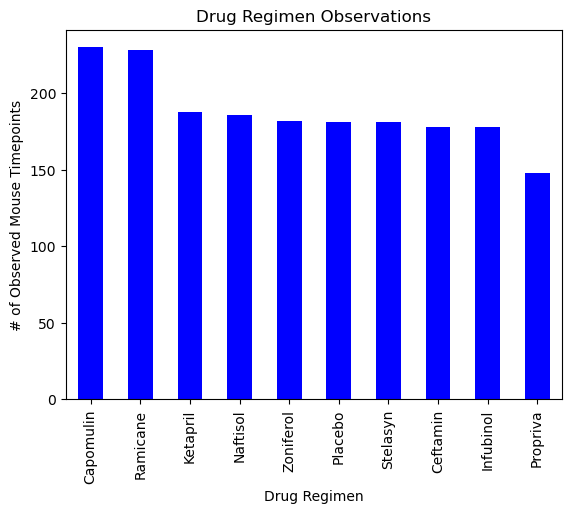

In [63]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
mouse_tp = mouse_nodup.groupby(['Drug Regimen'])['Timepoint'].count()
fig1 = mouse_tp.sort_values(ascending=False).plot(kind= 'bar', color=["blue"],
            title="Drug Regimen Observations",
            xlabel= "Drug Regimen",
            ylabel= "# of Observed Mouse Timepoints")


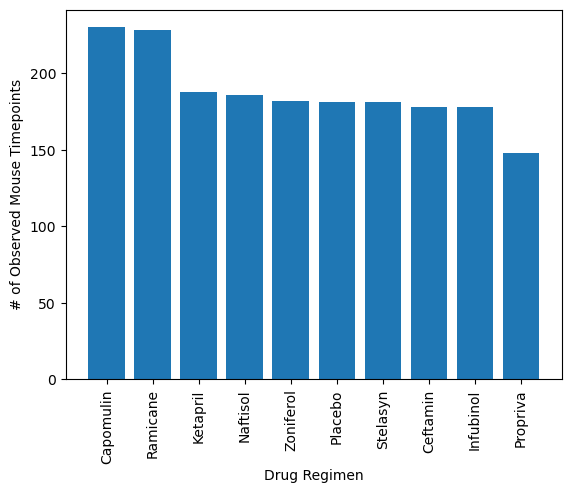

In [64]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
mouse_tp_srt = mouse_tp.sort_values(ascending=False)
plt.bar(mouse_tp_srt.index, mouse_tp_srt.values)
plt.xlabel('Drug Regimen')  
plt.ylabel('# of Observed Mouse Timepoints', size=10) 
plt.xticks(rotation='vertical')  
plt.savefig('pyplot_bar_Time')
plt.show()


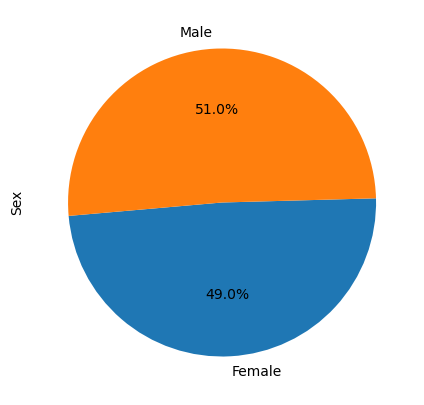

In [65]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mouse_sex = mouse_nodup.groupby(['Sex'])['Sex'].count()
fig2 = mouse_sex.plot.pie(startangle=185,autopct='%1.1f%%', figsize=(5, 5)) 
            


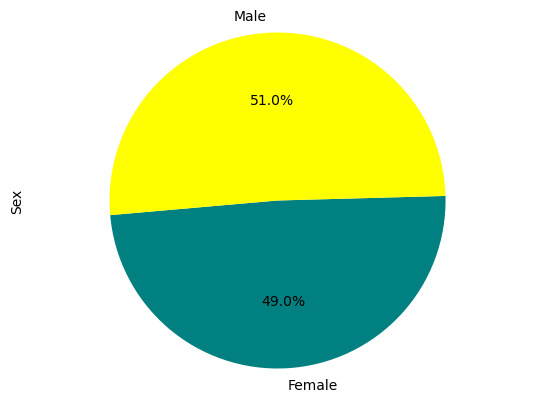

In [66]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.ylabel("Sex")
plt.pie(mouse_sex, labels=('Female', 'Male'),
        autopct="%1.1f%%", startangle=185, colors = ['teal', 'yellow'])
plt.axis("equal")
plt.savefig('pyplot_pie_sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [67]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
mouse_vol = pd.DataFrame(mouse_nodup.groupby(['Mouse ID'])['Timepoint'].max())

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
#   Right merge to get only the last Timepoint
mouse_final = pd.merge(mouse_nodup, mouse_vol, on=('Mouse ID', 'Timepoint'), how='right')
mouse_final


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [68]:
# Put treatments into a list for for loop (and later for plot labels)
drugs = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']


# Create empty list to fill with tumor vol data (for plotting)
cap = []
ram = []
inf = []
cef = []
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
for index, row in mouse_final.iterrows():
    if row["Drug Regimen"] == drugs[0]:
        cap.append(row['Tumor Volume (mm3)'])
    if row["Drug Regimen"] == drugs[1]:
        ram.append(row['Tumor Volume (mm3)'])
    if row["Drug Regimen"] == drugs[2]:
        inf.append(row['Tumor Volume (mm3)'])
    if row["Drug Regimen"] == drugs[3]:
        cef.append(row['Tumor Volume (mm3)'])
    
# add subset 
mouse_drugs = pd.DataFrame ({drugs[0]: cap,
                             drugs[1]: ram,
                             drugs[2]: inf,
                             drugs[3]: cef
                            })
   
# calculate the IQR 
for column in mouse_drugs:
    quartiles = mouse_drugs[column].quantile([.25,.5,.75])
    lower_quart = quartiles[0.25]
    upper_quart = quartiles[0.75]
    iqr = upper_quart - lower_quart
    print(f'IQR for {column}: {iqr}')
    # Determine outliers using upper and lower bounds
    lower_bound = lower_quart - (1.5*iqr)
    upper_bound = upper_quart + (1.5*iqr)
    outliers = mouse_drugs[column][(mouse_drugs[column] <= lower_bound) | (mouse_drugs[column] >= upper_bound)]
    print(outliers)
   # print('The following are the outliers in the data:{}'.format(outliers))

IQR for Capomulin: 7.781863460000004
Series([], Name: Capomulin, dtype: float64)
IQR for Ramicane: 9.098536719999998
Series([], Name: Ramicane, dtype: float64)
IQR for Infubinol: 11.477135160000003
5    36.321346
Name: Infubinol, dtype: float64
IQR for Ceftamin: 15.577752179999997
Series([], Name: Ceftamin, dtype: float64)


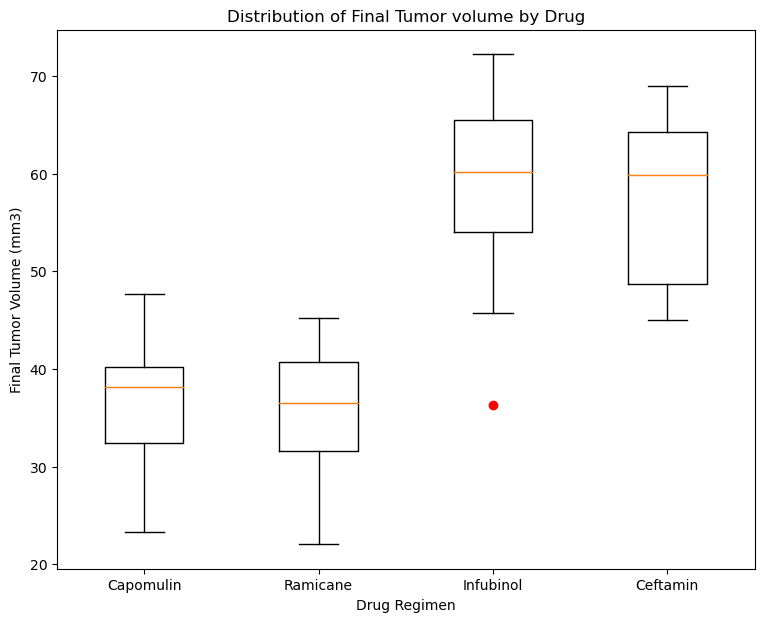

In [69]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

boxplot_list = [mouse_drugs[drugs[0]],
                mouse_drugs[drugs[1]],
                mouse_drugs[drugs[2]],
                mouse_drugs[drugs[3]]
               ]
# used plt.subplots to define size
fig1, ax = plt.subplots(figsize=(9,7))
ax.set_title('Distribution of Final Tumor volume by Drug') #set title
ax.set_xlabel('Drug Regimen') # set x label
ax.set_ylabel('Final Tumor Volume (mm3)') #set y lable
# used ax.boxplot function and ran the parameter boxplot_list to create the boxplot
ax.boxplot(boxplot_list, 0, 'red')
plt.xticks([1,2,3,4], drugs) # set labels of each boxplot
plt.savefig('boxplot_final_tumor')
plt.show()

## Line and Scatter Plots

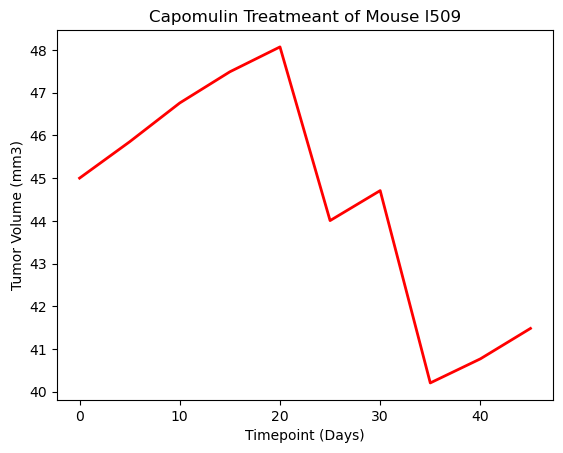

In [70]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
# create dataframd for just l509
mouse_l509 = mouse_nodup.loc[mouse_nodup['Mouse ID']== 'l509']
# create title
plt.title('Capomulin Treatmeant of Mouse l509')  
# create X axis & labels
x_axis_time = mouse_l509['Timepoint'] 
plt.xlabel('Timepoint (Days)')
# create y axis & labels
y_axis_size = mouse_l509['Tumor Volume (mm3)'] 
plt.ylabel('Tumor Volume (mm3)')
# plot information
plt.plot(x_axis_time, y_axis_size, linewidth=2, markersize=12, color = 'red') 
# save & print 
plt.savefig('linechart_l509')
plt.show()

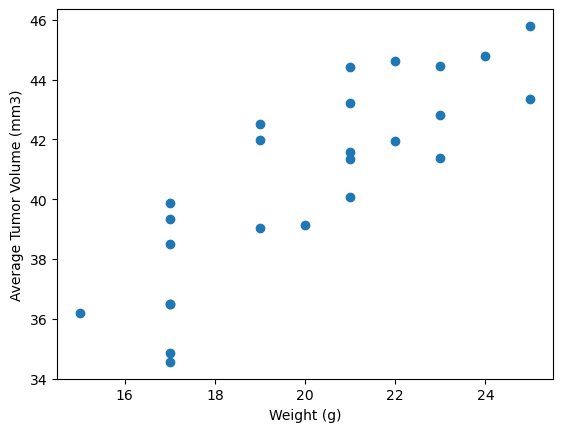

In [71]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
# create a dataframe with just Capomulin
mouse_cap = mouse_nodup.loc[mouse_nodup["Drug Regimen"] == 'Capomulin', ['Mouse ID', 'Weight (g)', 'Tumor Volume (mm3)' ]]
 
# groupby to create 1 data point per mouse weight & Avg tumor volume
mouse_avg = mouse_cap.groupby('Mouse ID').mean()
 
# create the scatter graph components
plt.scatter(mouse_avg['Weight (g)'],mouse_avg['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.savefig('scatterplot_Capomulin')
plt.show()


## Correlation and Regression

The correlation between mouse weight and average tumor volume is 0.84


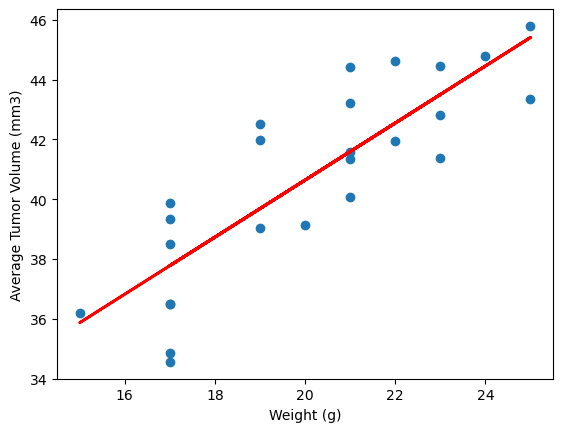

In [72]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
mouse_corr=round(st.pearsonr(mouse_avg['Weight (g)'],mouse_avg['Tumor Volume (mm3)'])[0],2)
print(f"The correlation between mouse weight and average tumor volume is {mouse_corr}")
# calculate the linear regression
mouse_model=st.linregress(mouse_avg['Weight (g)'],mouse_avg['Tumor Volume (mm3)'])
# create the scatter plot
plt.scatter(mouse_avg['Weight (g)'],mouse_avg['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

# equation of the line y = M * X + B
y = mouse_model.slope*mouse_avg['Weight (g)']+mouse_model.intercept
plt.plot(mouse_avg['Weight (g)'], y, linewidth=2, markersize=12, color = 'red')
plt.savefig('Correlation_Regreassion')
plt.show()